In [115]:
import os
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [116]:
matplotlib.rcParams['figure.figsize'] = (8, 8)
sns.set_style('whitegrid')

In [86]:
FILE_PATH = '/Users/anton.andreytsev/empirical_statistics_ef_msu/'

In [91]:
dat = pd.read_csv(os.path.join(FILE_PATH, 'data/german.csv'), sep=';')
dat.columns = ['_'.join(col.lower().replace('/',' ').strip().split()) for col in dat.columns]
print(dat.shape)
dat.head()

(1000, 21)


,status_of_existing_checking_account,duration_in_month,credit_history,purpose,credit_amount,savings_account_bonds,present_employment_since,installment_rate_in_percentage_of_disposable_income,personal_status_and_sex,other_debtors_guarantors,...,property,age_in_years,other_installment_plans,housing,number_of_existing_credits_at_this_bank,job,number_of_people_being_liable_to_provide_maintenance_for,telephone,foreign_worker,bad_credit
0,1 : ... < 0 DM,6,4 : critical account/ other credits existing (...,3 : radio/television,1169,5 : unknown/ no savings account,5 : .. >= 7 years,4,3 : male : single,1 : none,...,1 : real estate,67,3 : none,2 : own,2,3 : skilled employee / official,1,"2 : yes, registered under the customers name",1 : yes,0
1,2 : 0 <= ... < 200 DM,48,2 : existing credits paid back duly till now,3 : radio/television,5951,1 : ... < 100 DM,3 : 1 <= ... < 4 years,2,2 : female : divorced/separated/married,1 : none,...,1 : real estate,22,3 : none,2 : own,1,3 : skilled employee / official,1,1 : none,1 : yes,1
2,4 : no checking account,12,4 : critical account/ other credits existing (...,6 : education,2096,1 : ... < 100 DM,4 : 4 <= ... < 7 years,2,3 : male : single,1 : none,...,1 : real estate,49,3 : none,2 : own,1,2 : unskilled - resident,2,1 : none,1 : yes,0
3,1 : ... < 0 DM,42,2 : existing credits paid back duly till now,2 : furniture/equipment,7882,1 : ... < 100 DM,4 : 4 <= ... < 7 years,2,3 : male : single,3 : guarantor,...,2 : if not 1 : building society savings agreem...,45,3 : none,3 : for free,1,3 : skilled employee / official,2,1 : none,1 : yes,0
4,1 : ... < 0 DM,24,3 : delay in paying off in the past,0 : car (new),4870,1 : ... < 100 DM,3 : 1 <= ... < 4 years,3,3 : male : single,1 : none,...,4 : unknown / no property,53,3 : none,3 : for free,2,3 : skilled employee / official,2,1 : none,1 : yes,1


Есть ли в данных пропуски

In [92]:
dat.isnull().sum()

status_of_existing_checking_account                         0
duration_in_month                                           0
credit_history                                              0
purpose                                                     0
credit_amount                                               0
savings_account_bonds                                       0
present_employment_since                                    0
installment_rate_in_percentage_of_disposable_income         0
personal_status_and_sex                                     0
other_debtors_guarantors                                    0
present_residence_since                                     0
property                                                    0
age_in_years                                                0
other_installment_plans                                     0
housing                                                     0
number_of_existing_credits_at_this_bank                     0
job     

Описательные статистики переменных

In [93]:
dat.describe()

,duration_in_month,credit_amount,installment_rate_in_percentage_of_disposable_income,present_residence_since,age_in_years,number_of_existing_credits_at_this_bank,number_of_people_being_liable_to_provide_maintenance_for,bad_credit
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,0.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,0.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,0.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,0.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,1.000000


Корреляционная матрица переменных

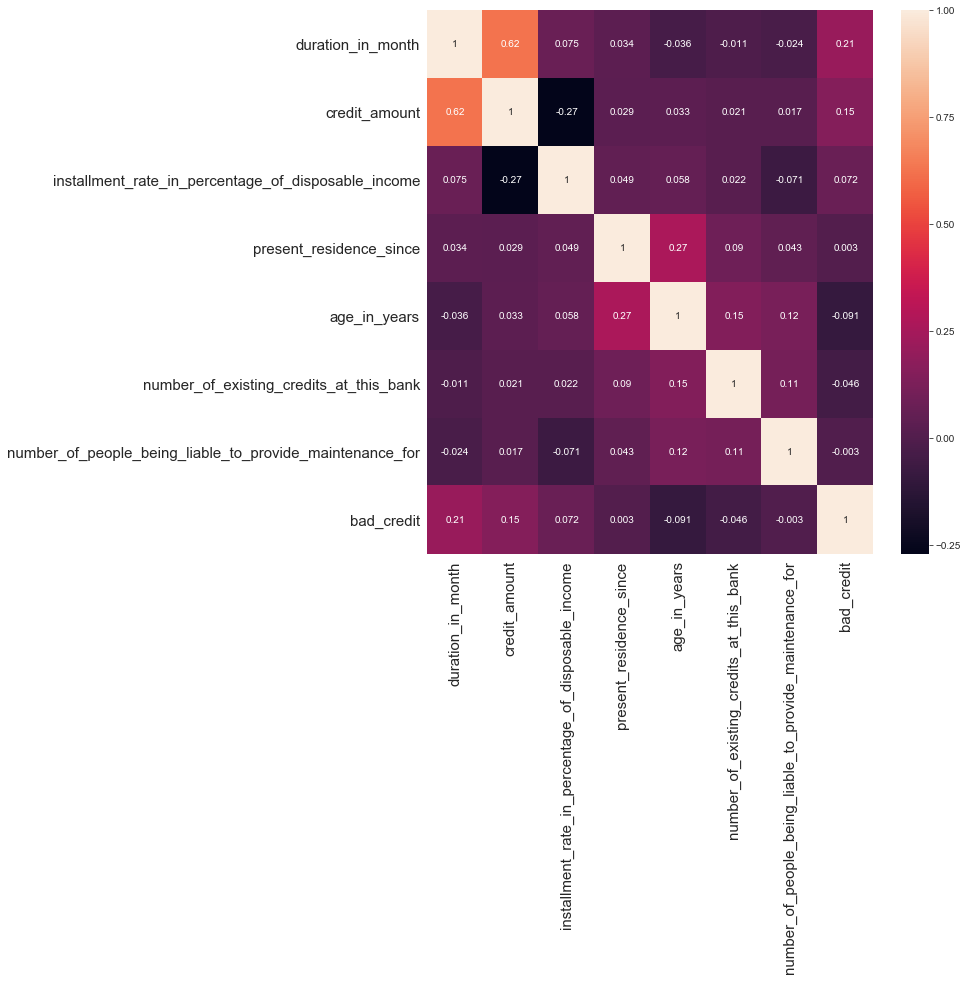

In [94]:
plt.figure(figsize=(10, 10))
sns.heatmap(dat.corr(), annot=True, annot_kws={'size': 10});
plt.xticks(fontsize=15);
plt.yticks(fontsize=15);

Сколько уникальных значений у каждой переменной

In [95]:
for col in dat.columns:
    print('{}:'.format(col), dat[col].value_counts().shape[0])

status_of_existing_checking_account: 4
duration_in_month: 33
credit_history: 5
purpose: 10
credit_amount: 921
savings_account_bonds: 5
present_employment_since: 5
installment_rate_in_percentage_of_disposable_income: 4
personal_status_and_sex: 4
other_debtors_guarantors: 3
present_residence_since: 4
property: 4
age_in_years: 53
other_installment_plans: 3
housing: 3
number_of_existing_credits_at_this_bank: 4
job: 4
number_of_people_being_liable_to_provide_maintenance_for: 2
telephone: 2
foreign_worker: 2
bad_credit: 2


Посмотрим на распределения переменных

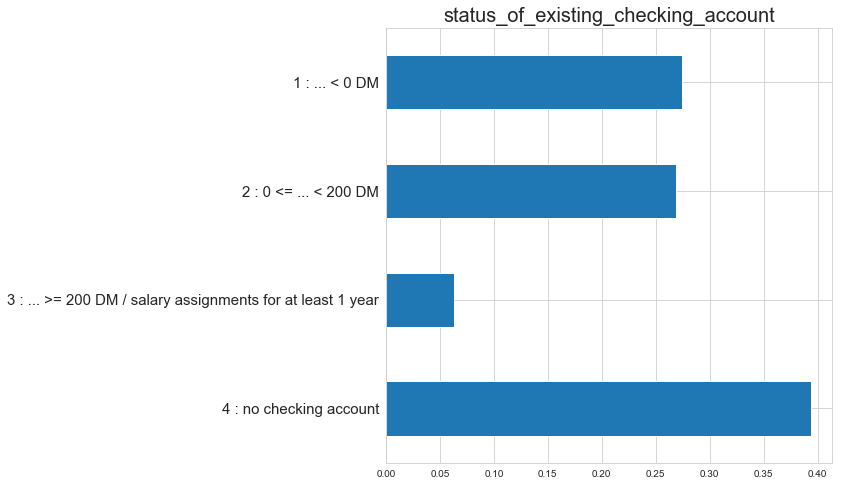

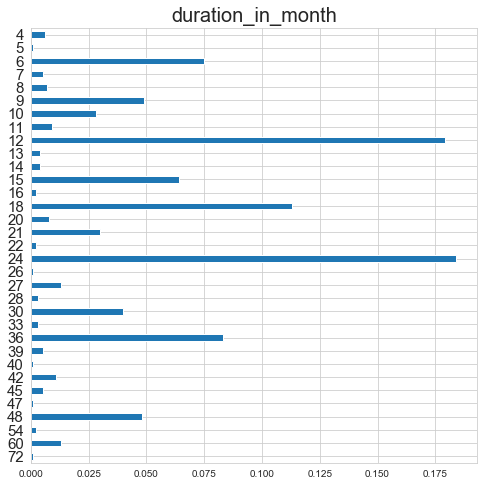

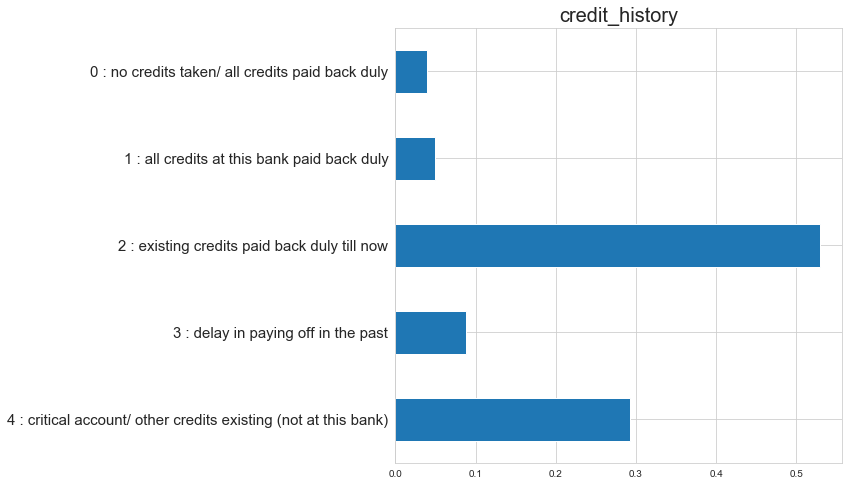

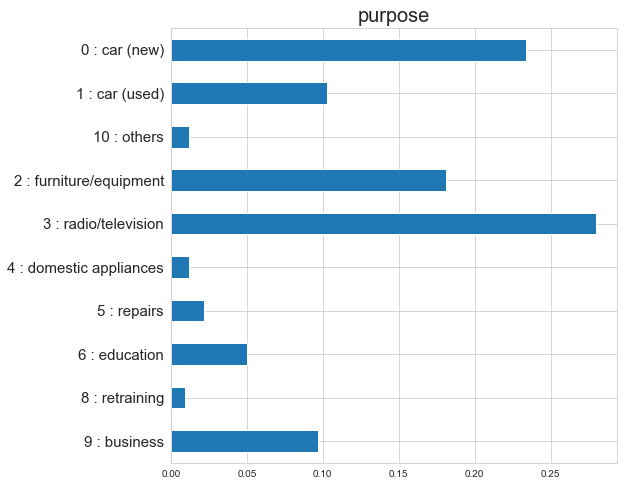

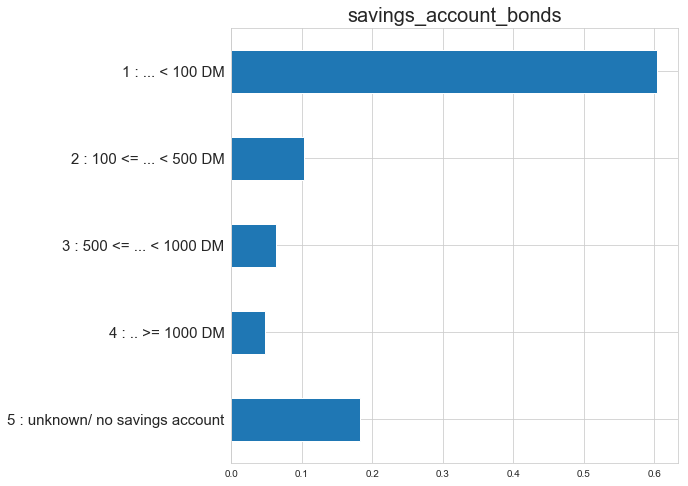

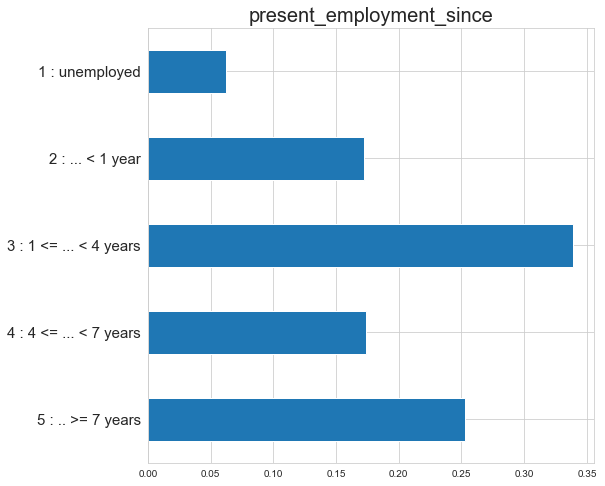

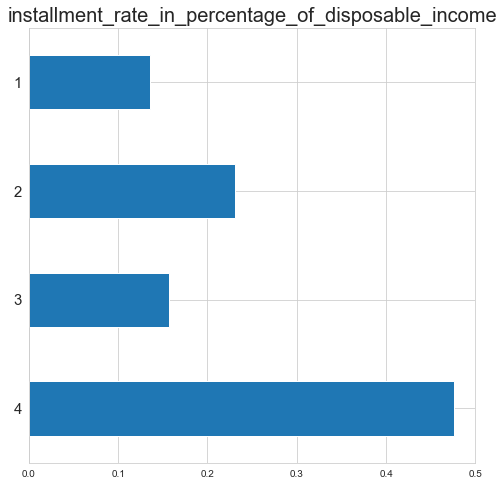

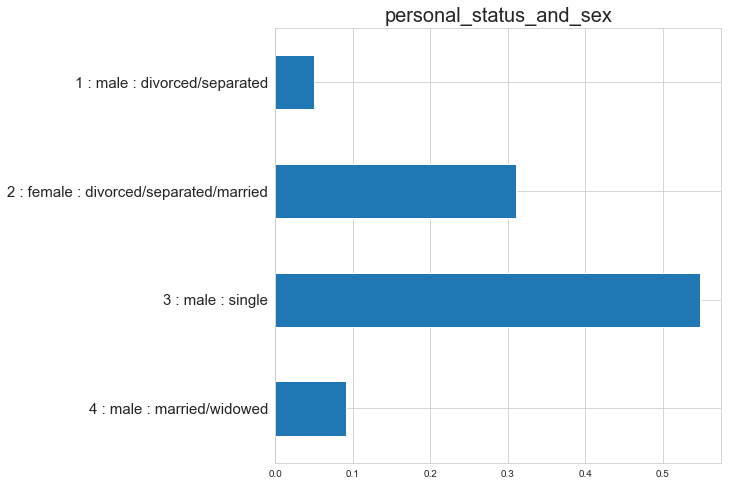

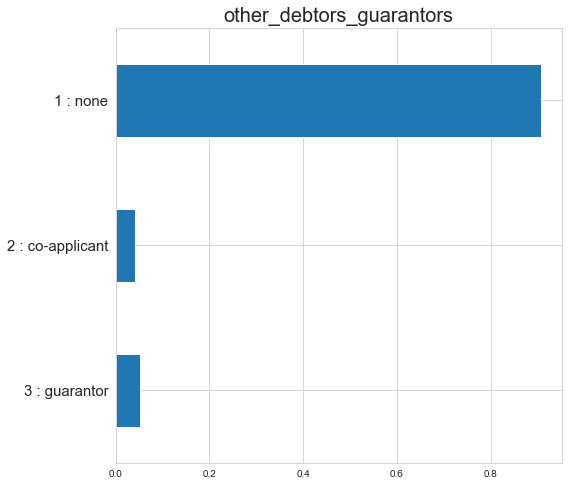

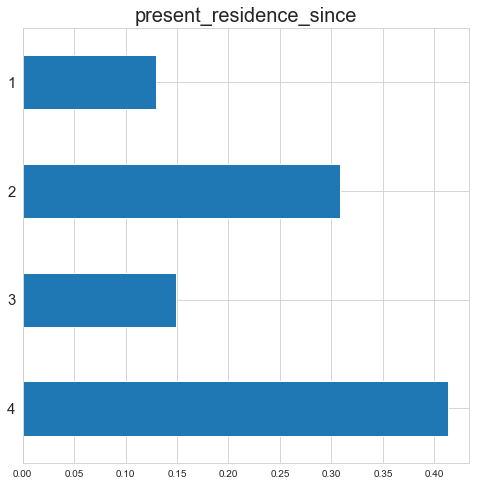

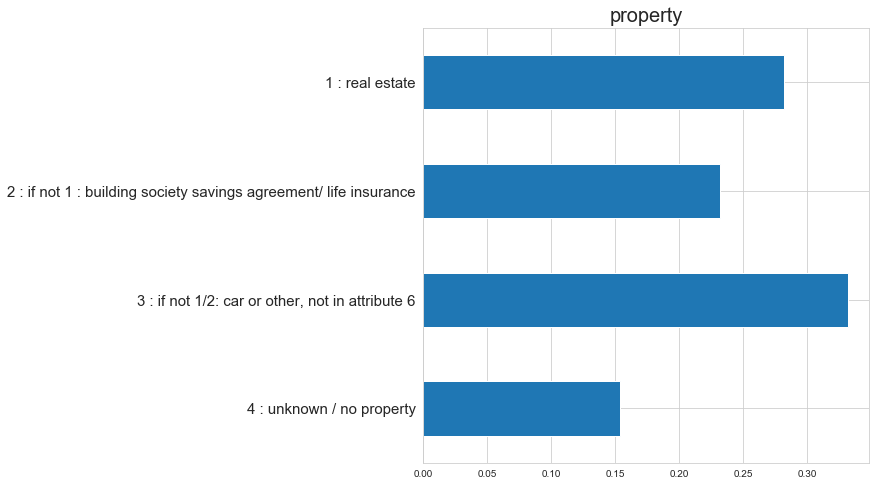

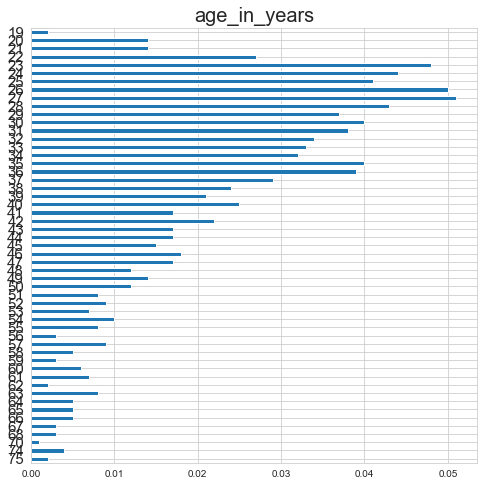

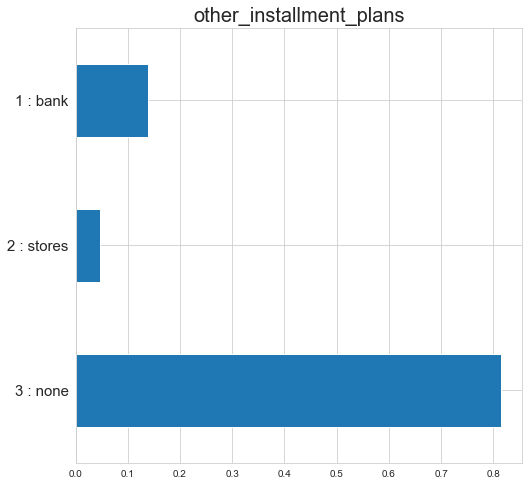

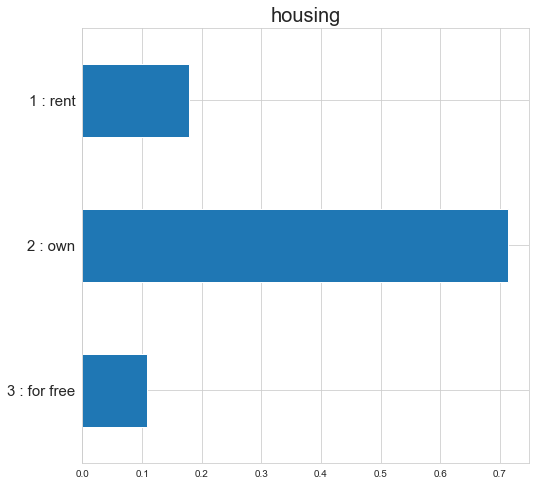

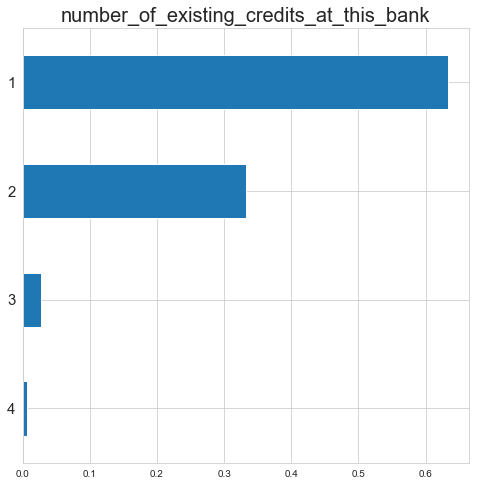

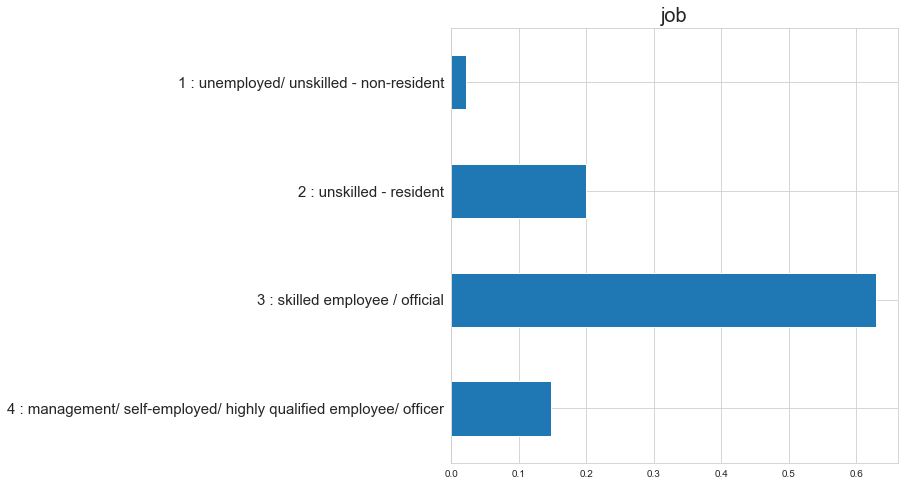

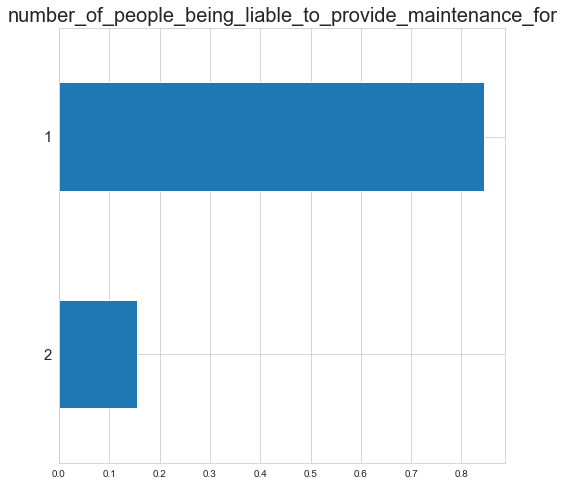

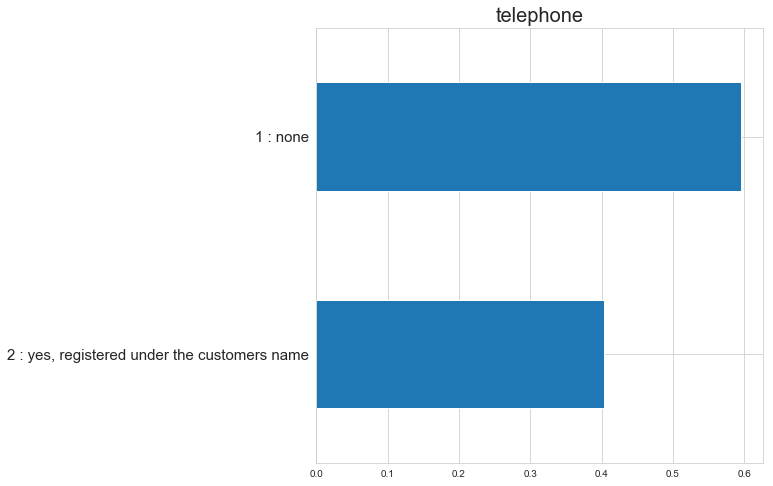

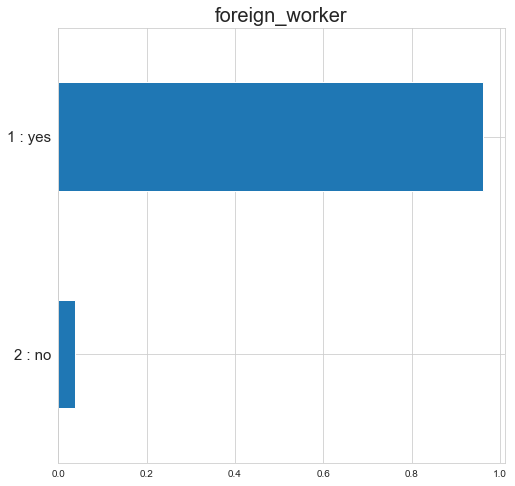

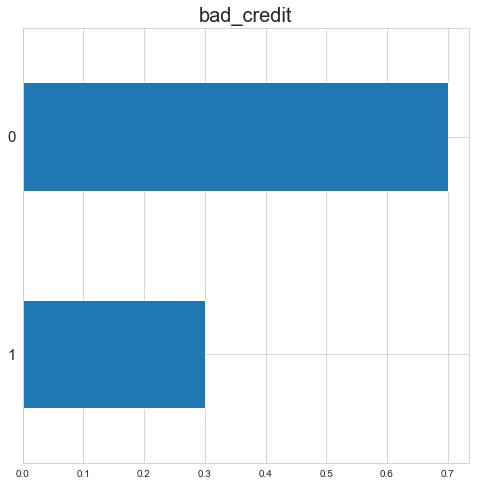

In [100]:
for col in dat.columns:
    if col == 'credit_amount':
        continue
    plt.figure(figsize=(8, 8))
    dat[col].value_counts(1).sort_index(ascending=False).plot(kind='barh');
    plt.yticks(fontsize=15);
    plt.title('{}'.format(col), fontsize=20);

Попробуем оценить условную вероятность одобрения кредита

In [ ]:
sns.distplot(dat.age_in_years[dat.bad_credit == 1])
sns.distplot(dat.age_in_years[dat.bad_credit == 0])

In [303]:
def p_y_x(y, x, data=dat):
    x_dom = np.array(list(data[x].value_counts().sort_index().keys()))
    p_x_y = np.zeros((data[y].value_counts().shape[0], x_dom.shape[0]))
    for n, y_value in enumerate(data[y].value_counts().sort_index().keys()):
        for m, x_value in enumerate(x_dom):
            p_x_y[n, m] = (data[x][data[y] == y_value] == x_value).mean()
    p_y = data[y].value_counts(1).sort_index().values
    p_x = p_y.dot(p_x_y)
    return x_dom, (p_y.reshape(-1, 1)*p_x_y/p_x).T

In [304]:
x, p = p_y_x(y='bad_credit', x='age_in_years')

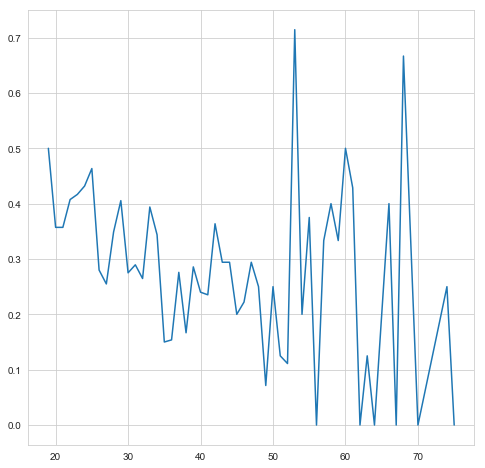

In [330]:
plt.plot(x_dom, p[:, 1]);

<BarContainer object of 53 artists>

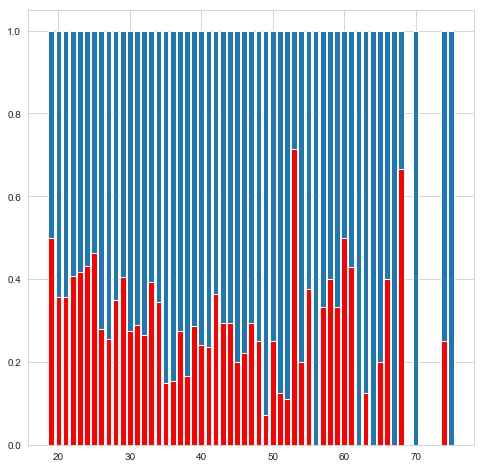

In [316]:
plt.bar(x, p[:, 1], color='red')
plt.bar(x, p[:, 0], bottom=p[:, 1])

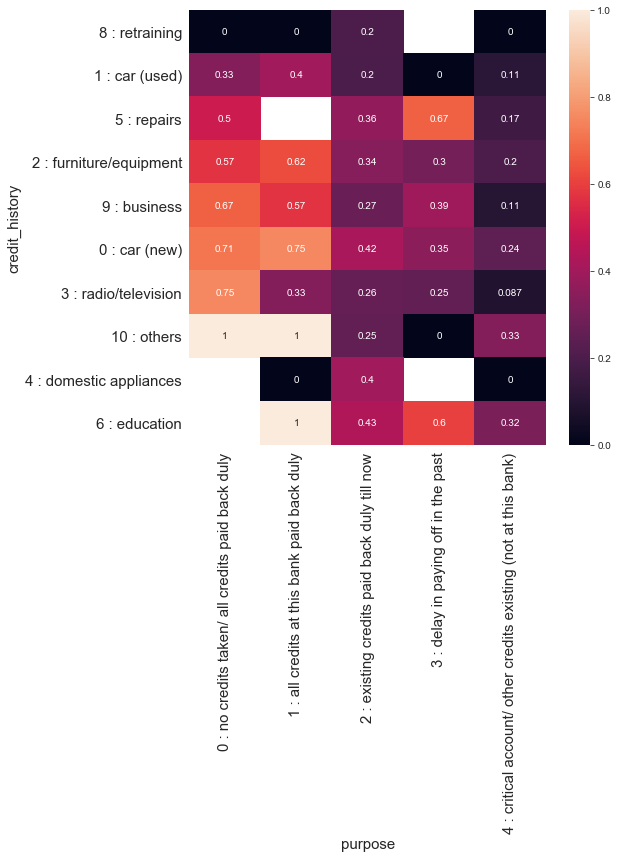

In [197]:
col1 = 'purpose'
col2 = 'credit_history'
a = pd.crosstab(dat[col1], dat[col2], dat['bad_credit'], aggfunc=np.mean)
sns.heatmap(a.sort_values(by=a.columns.values.tolist()), annot=True, annot_kws={'size': 10});
plt.yticks(fontsize=15);
plt.ylabel(col2, fontsize=15);
plt.xlabel(col1, fontsize=15);
plt.xticks(fontsize=15);

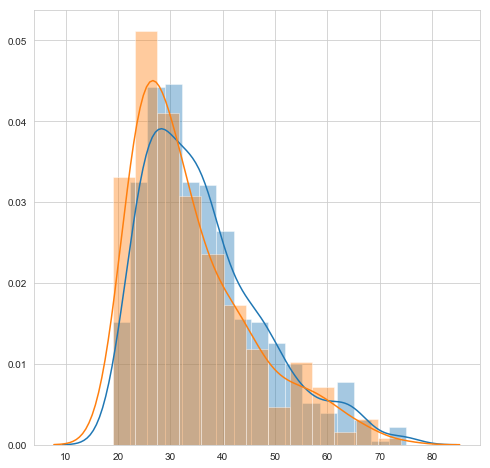

In [117]:
sns.distplot(dat.age_in_years[dat.bad_credit == 0].values)
sns.distplot(dat.age_in_years[dat.bad_credit == 1].values)